In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

from tensorflow.keras import models
from tensorflow.keras import backend as K

In [2]:
def process_image(image_path, dim):
    
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    t_image = cv2.resize(image, (dim, dim))
    t_image = np.expand_dims(t_image, axis=0)
    t_image = t_image.reshape(-1, dim, dim, 3)
    t_image = t_image.astype('float32')
    
    return t_image

In [3]:
image_path = 'test_images/DRUSEN/DRUSEN-9280370-9.jpeg'

t_image = process_image(image_path, 100)

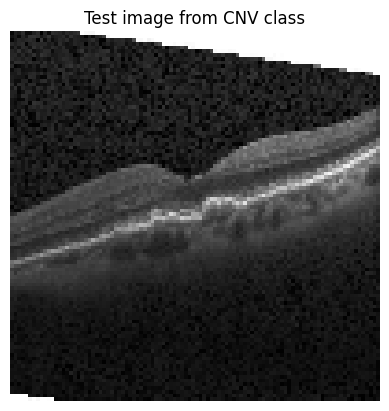

In [4]:
plt.figure()
plt.imshow(t_image[0].astype('uint8'))
plt.axis('off')
plt.title("Test image from CNV class")
plt.show()

In [5]:
model = models.load_model('saved_models/FCNNplus/')

In [6]:
# Loading trained model
model = models.load_model('saved_models/FCNNplus/')

# Block 01 
conv2d_1_1 = model.get_layer('conv1_block01').output
conv2d_2_1 = model.get_layer('conv2_block01').output
conv2d_3_1 = model.get_layer('conv3_block01').output
conv1d_1 = model.get_layer('conv1d_1').output

# Block 02
conv2d_1_2 = model.get_layer('conv1_block02').output
conv2d_2_2 = model.get_layer('conv2_block02').output
conv2d_3_2 = model.get_layer('conv3_block02').output
conv1d_2 = model.get_layer('conv1d_2').output

# Outputs 
layer_outputs = [conv2d_1_1, conv2d_2_1, conv2d_3_1, conv1d_1,
                conv2d_1_2, conv2d_2_2, conv2d_3_2, conv1d_2]

# Activation models
activation_model_1 = models.Model(inputs=model.input, outputs=conv2d_1_1)
activation_model_2 = models.Model(inputs=model.input, outputs=conv2d_2_1)
activation_model_3 = models.Model(inputs=model.input, outputs=conv2d_3_1)
activation_model_4 = models.Model(inputs=model.input, outputs=conv1d_1)
activation_model_5 = models.Model(inputs=model.input, outputs=conv2d_1_2)
activation_model_6 = models.Model(inputs=model.input, outputs=conv2d_2_2)
activation_model_7 = models.Model(inputs=model.input, outputs=conv2d_3_2)
activation_model_8 = models.Model(inputs=model.input, outputs=conv1d_2)

# Activations
activations_1 = activation_model_1(t_image)
activations_2 = activation_model_2(t_image)
activations_3 = activation_model_3(t_image)
activations_4 = activation_model_4(t_image)
activations_5 = activation_model_5(t_image)
activations_6 = activation_model_6(t_image)
activations_7 = activation_model_7(t_image)
activations_8 = activation_model_8(t_image)

activations = [activations_1,
              activations_2,
              activations_3,
              activations_4,
              activations_5,
              activations_6,
              activations_7,
              activations_8]

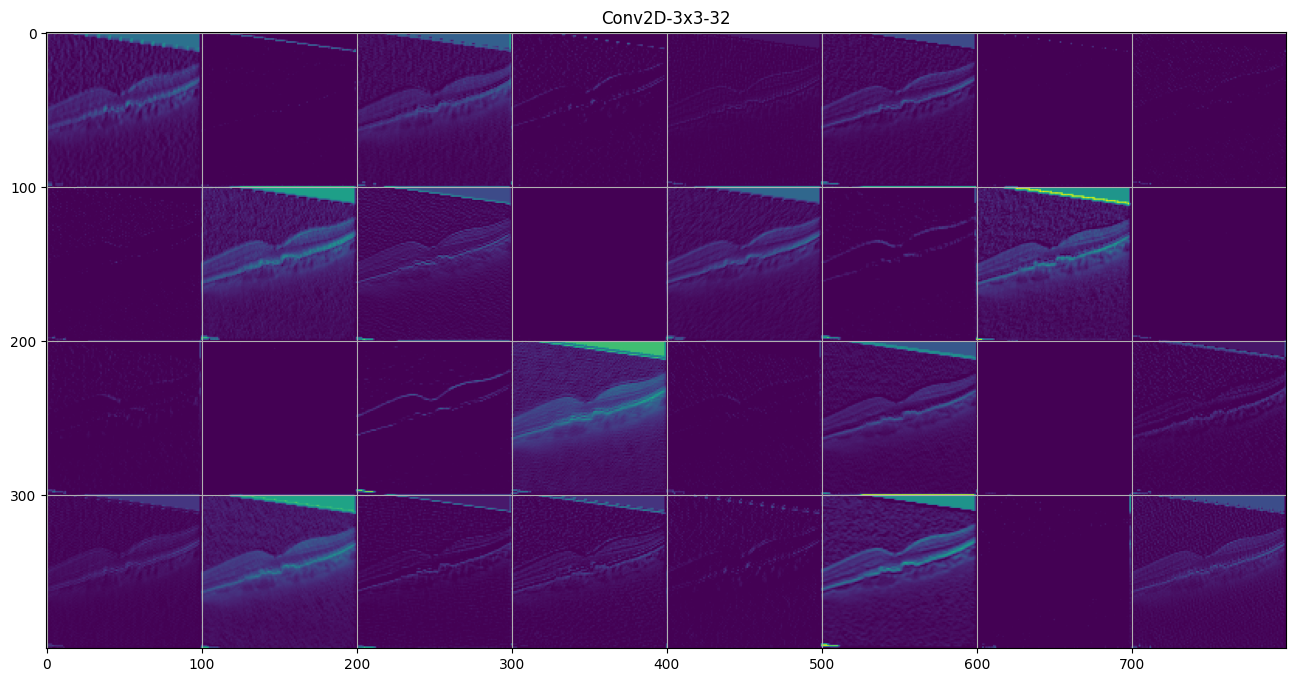

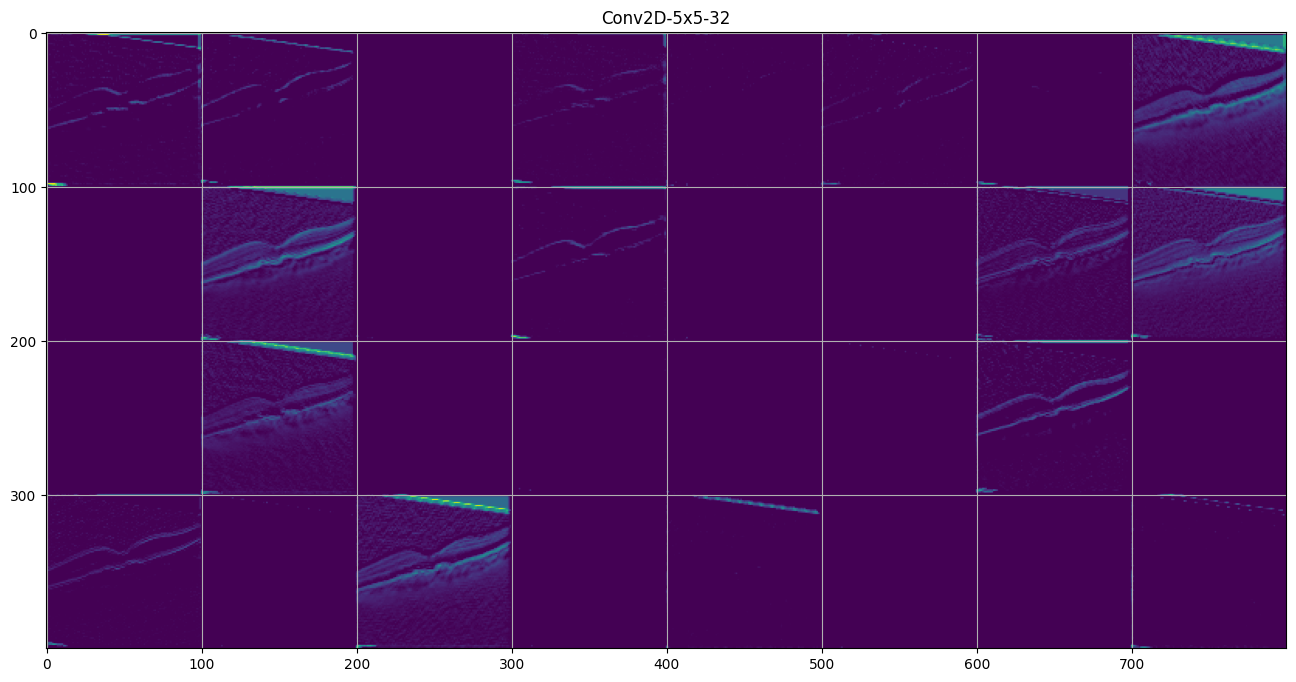

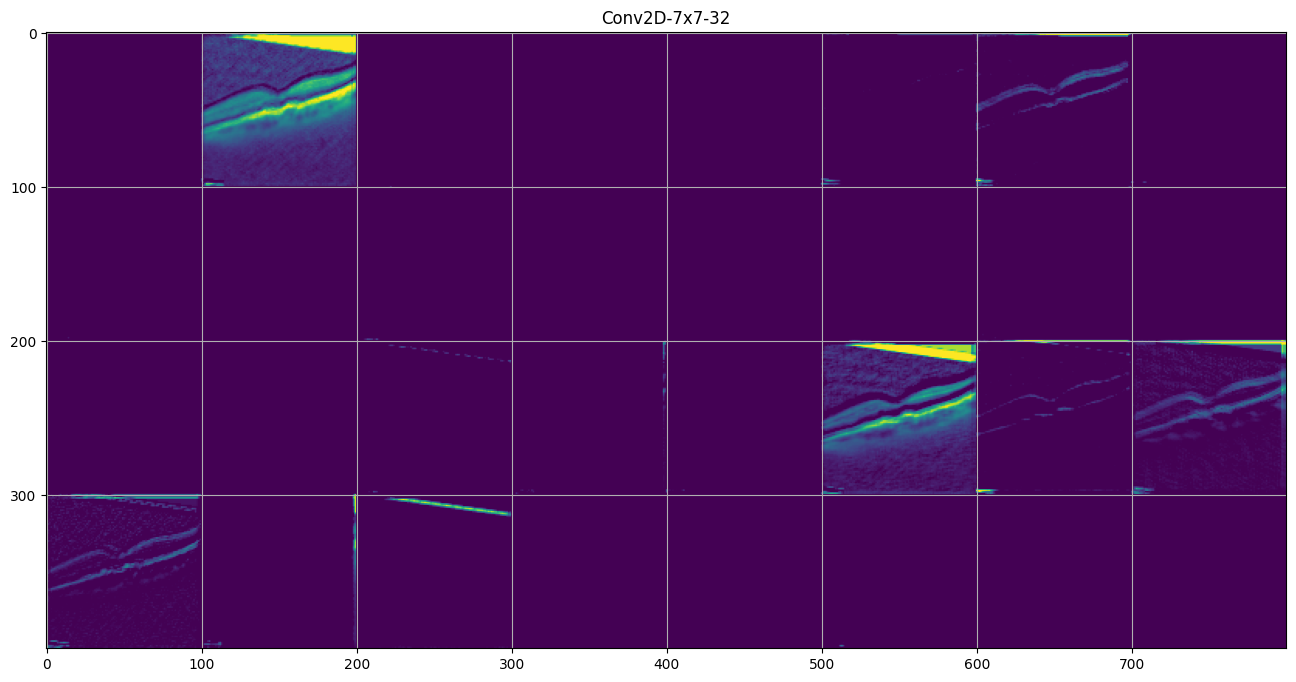

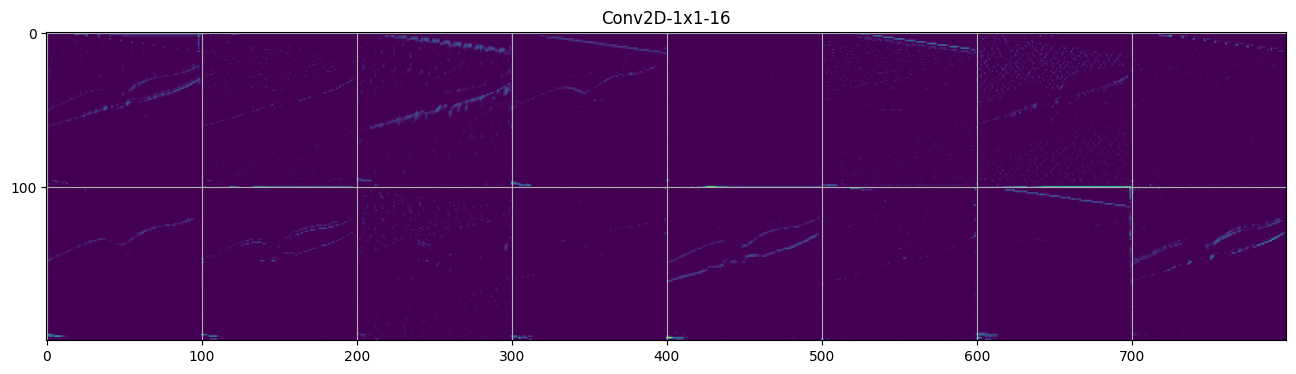

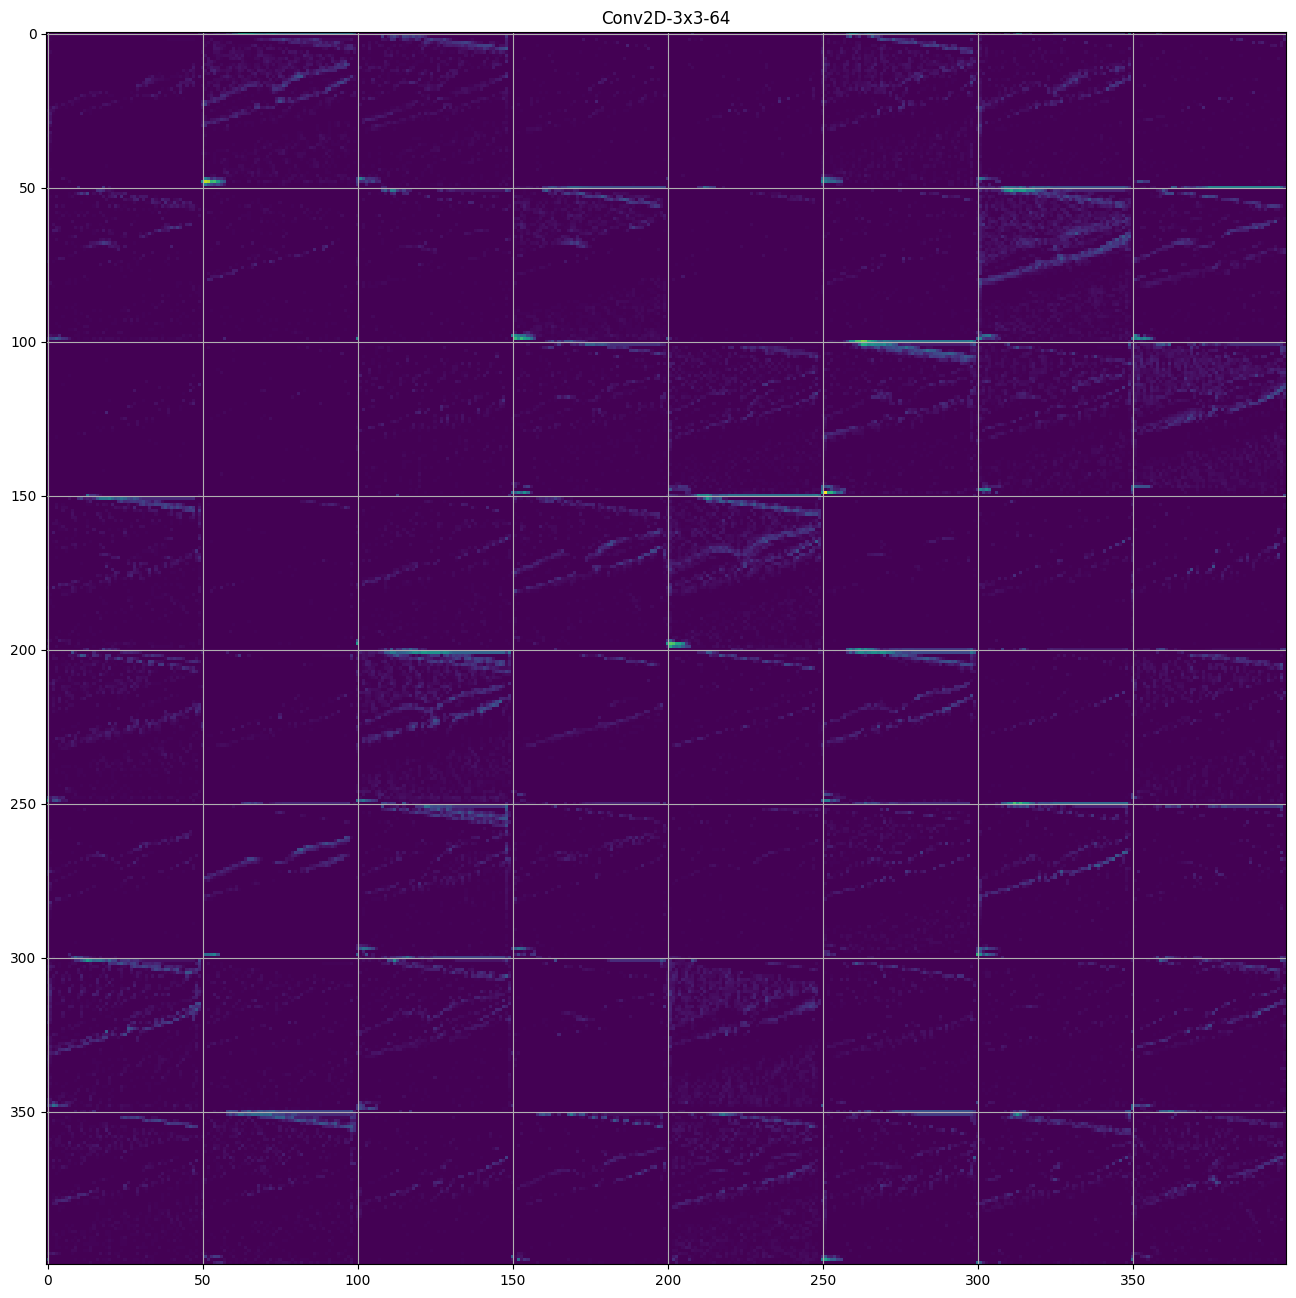

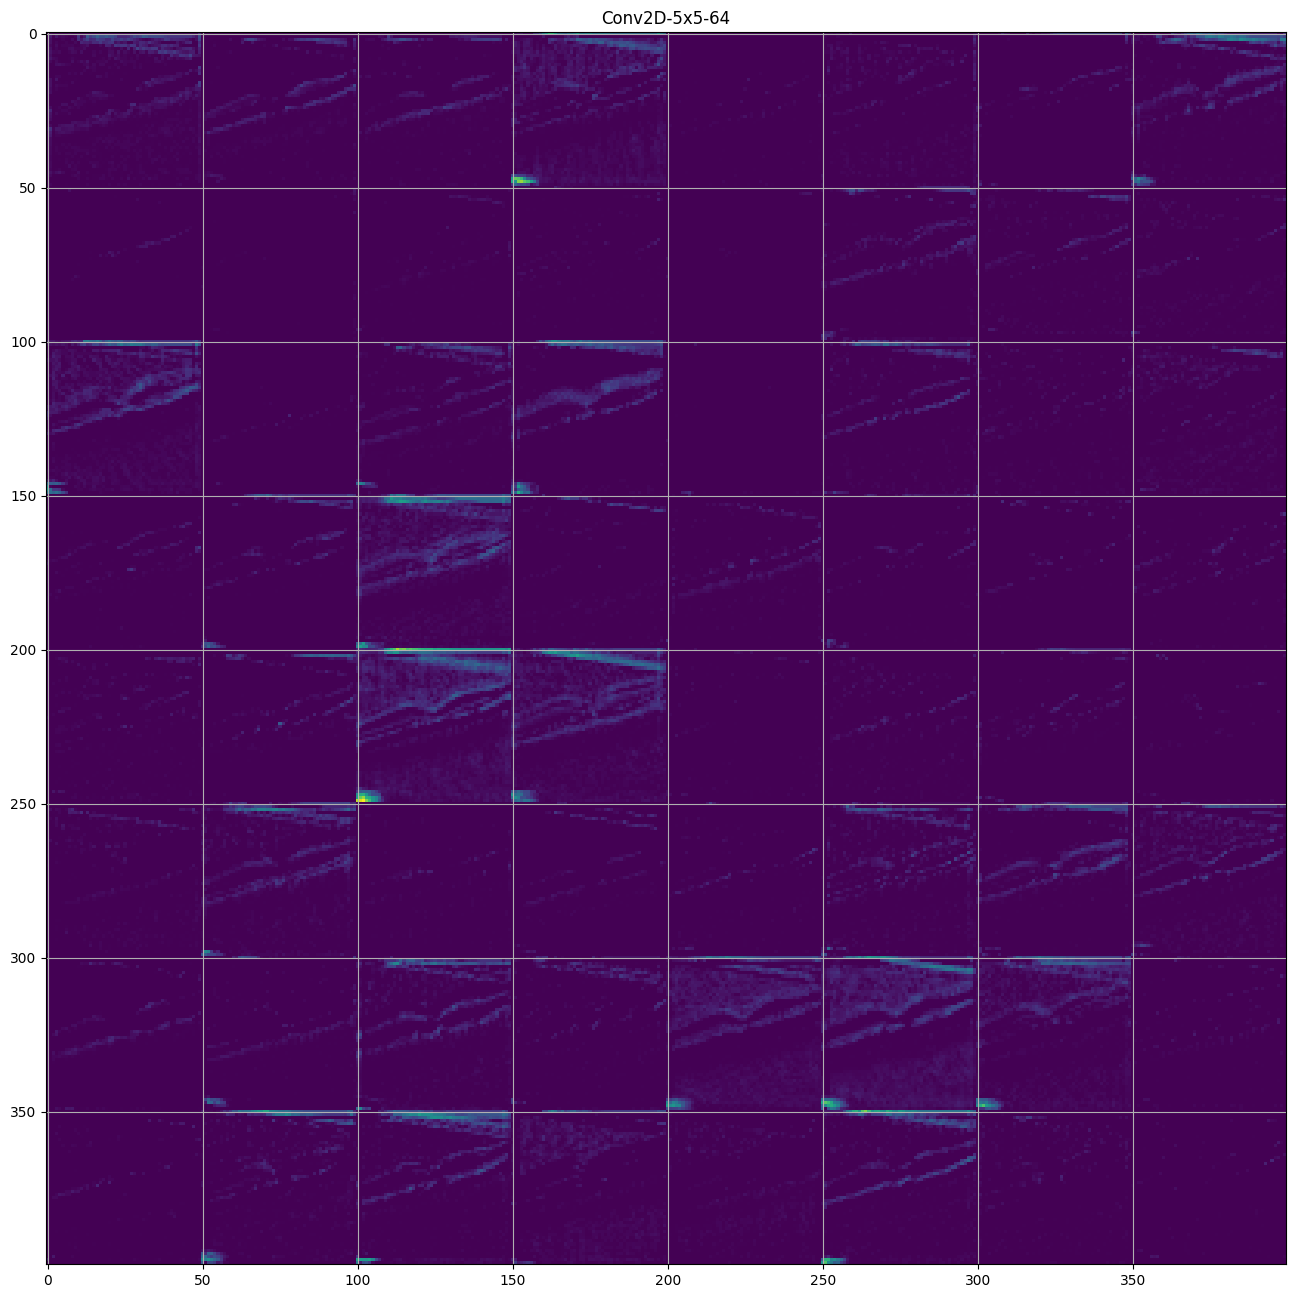

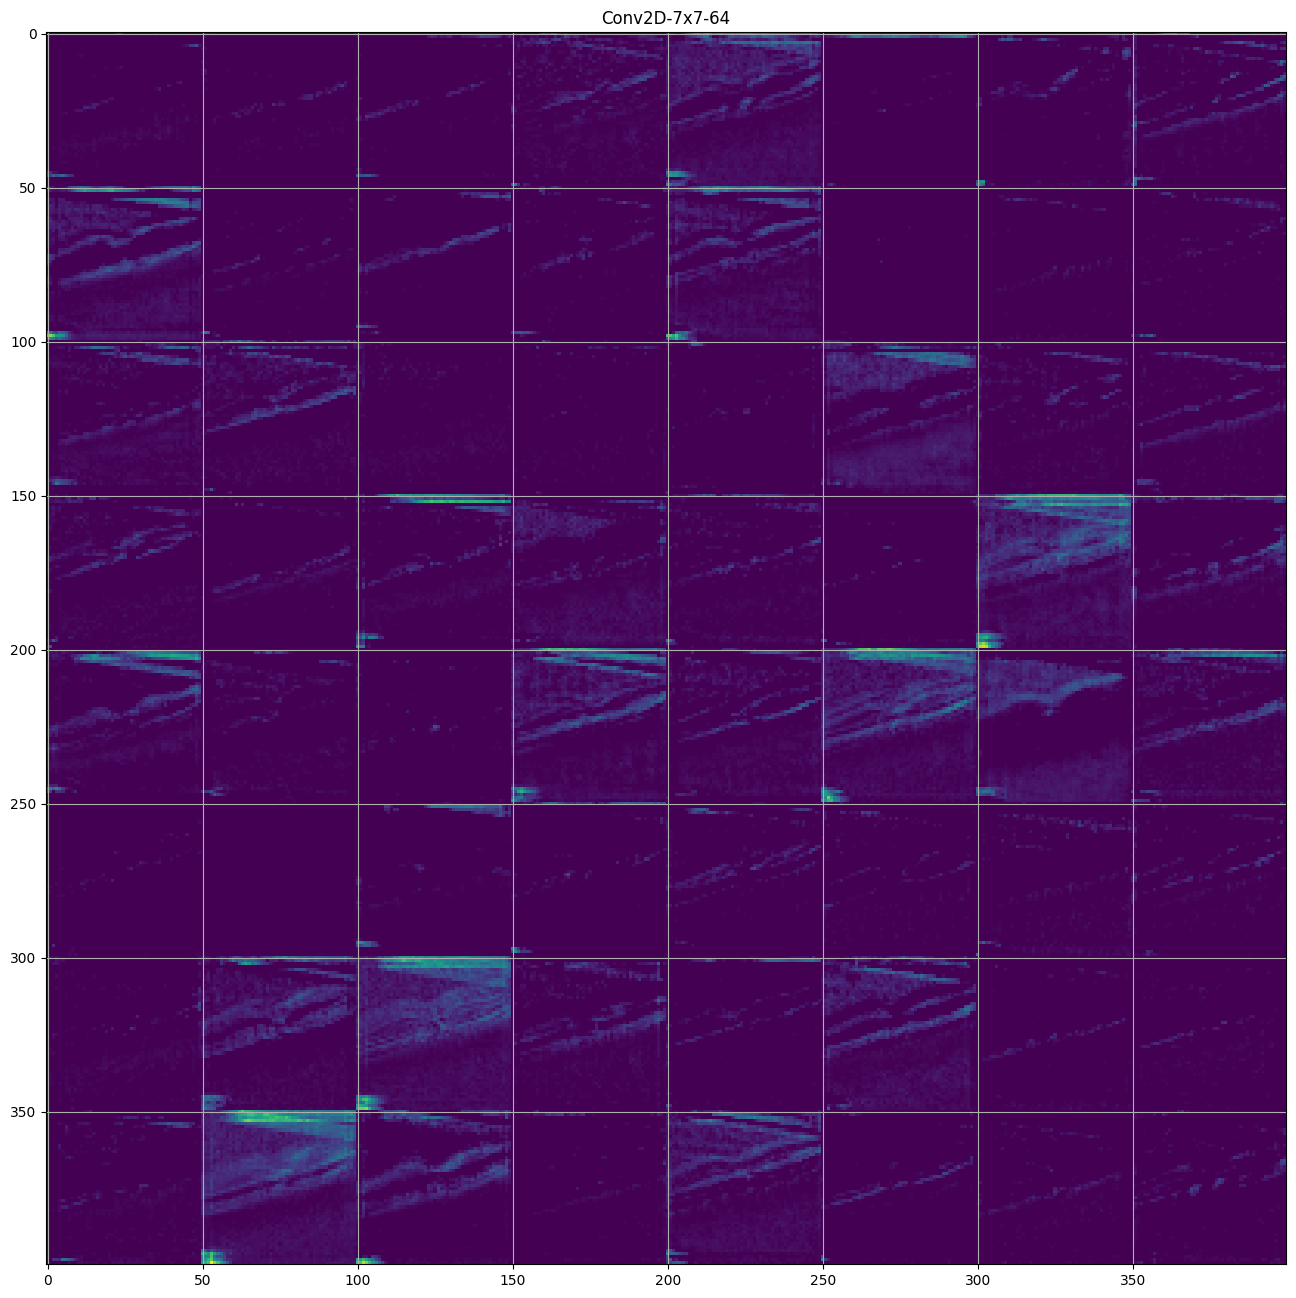

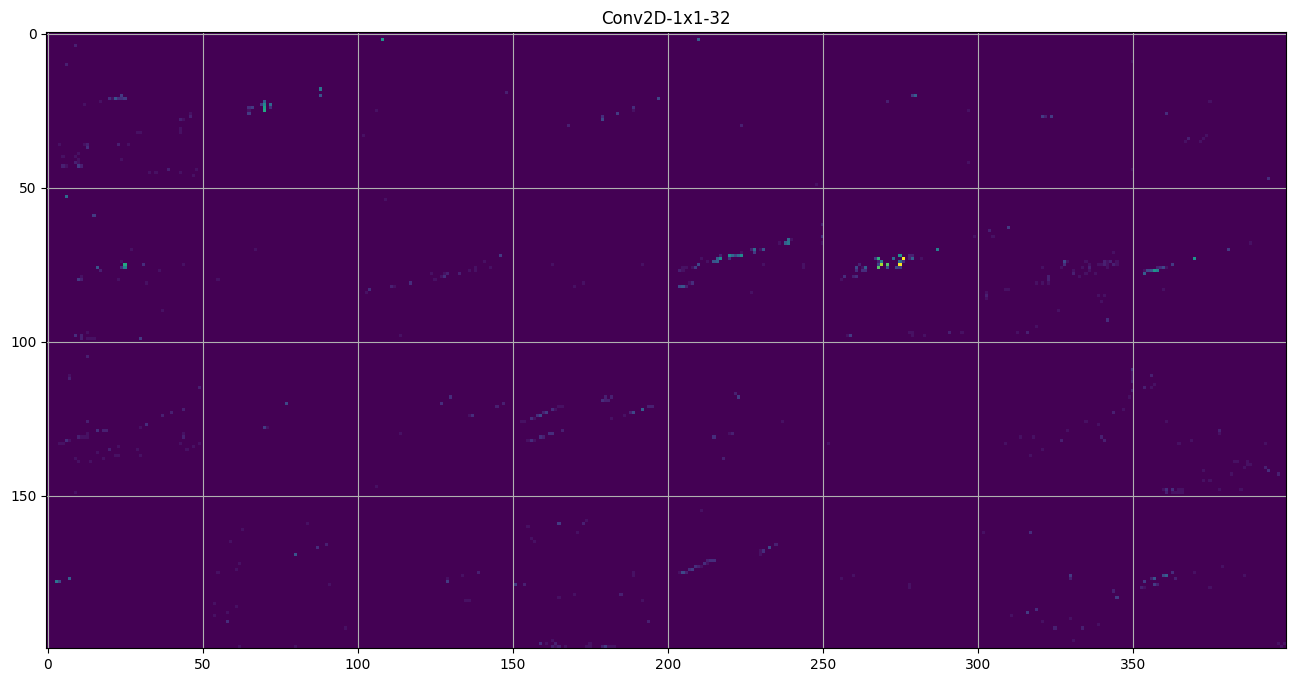

In [7]:
layer_names = ['Conv2D-3x3-32',
               'Conv2D-5x5-32',
               'Conv2D-7x7-32',
               'Conv2D-1x1-16',
               'Conv2D-3x3-64',
               'Conv2D-5x5-64',
               'Conv2D-7x7-64',
               'Conv2D-1x1-32']

images_per_row = 8
i = 1

for name, activation in zip(layer_names, activations):
    n_features = activation.shape[-1]
    n_cols = n_features // images_per_row
    size =activation.shape[1]
    display_grid = np.zeros((size*n_cols, size*images_per_row))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            
            channel_image = activation[0, :, :, col*images_per_row + row].numpy()
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
            
    scale = 1. / size
    plt.figure(figsize=(2 * scale * display_grid.shape[1], 2 * scale * display_grid.shape[0]))
    plt.title(name)
    plt.yticks(np.arange(0, size*n_cols, size))
    plt.xticks(np.arange(0, size*images_per_row, size))
    plt.grid(True)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.axis('on')
    i += 1
    plt.show()